# 1. DATA INSPECTION

1.1 Import Libraries

In [2]:
# Import python libraries into jupiter notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1.2 Load Datasets

In [3]:

# Load cleaned Datasets
spotify_tracks = pd.read_csv('../data/03_spotify_cleaned_dataset.csv')
display(spotify_tracks.head())
# Display the first few rows of the dataset
spotify_tracks.info()
# Display the summary of the dataset



,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_bin,danceability_bin,energy_bin
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,High,"(0.492, 0.739]","(0.25, 0.5]"
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,High,"(0.246, 0.492]","(-0.001, 0.25]"
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,High,"(0.246, 0.492]","(0.25, 0.5]"
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,High,"(0.246, 0.492]","(-0.001, 0.25]"
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Very High,"(0.492, 0.739]","(0.25, 0.5]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             11

## 2. EDA Using Basic Visualisations.

2.1 Correlation analysis using Pearson correlation Heatmap

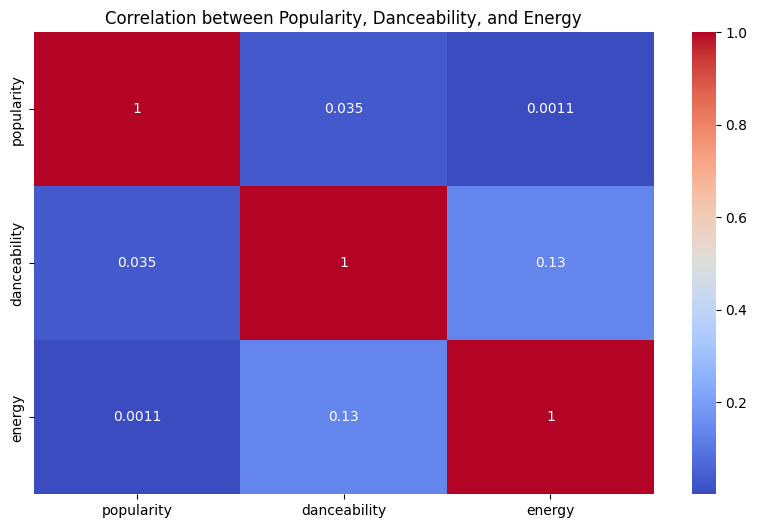

In [ ]:
# correlations between popularity, danceability, and energy
correlation = spotify_tracks[['popularity', 'danceability', 'energy']].corr()
# Set the figure size before plotting
plt.figure(figsize=(10, 6))
# Display the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Popularity, Danceability, and Energy')
plt.show()

2.2 Pairplot showing a multivariate relationship between Energy, Valence, Danceability and how these features affect Popularity

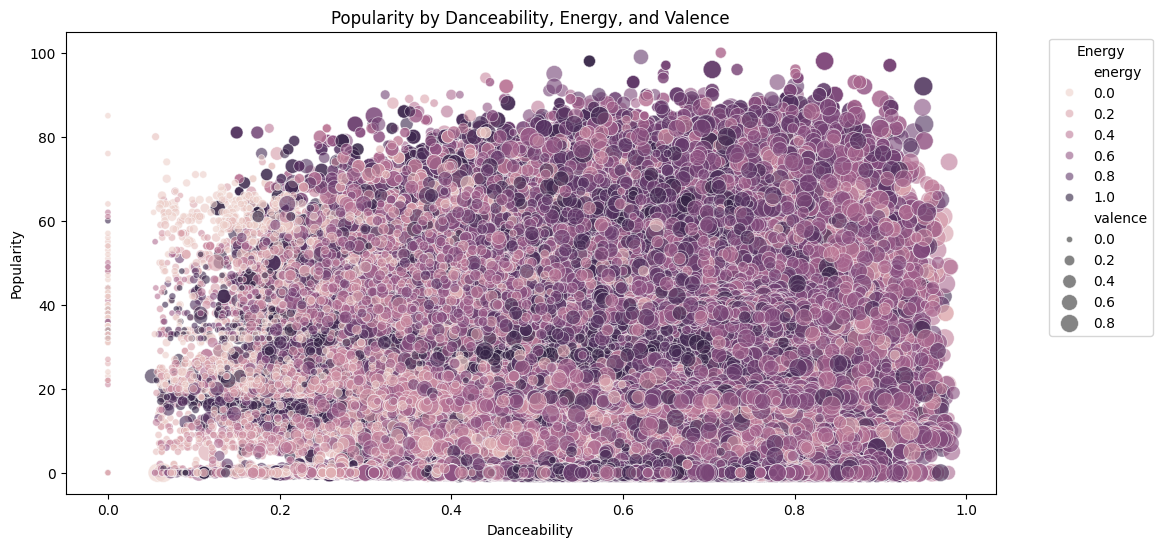

In [5]:
# popularity by danceability, energy, and valence
plt.figure(figsize=(12, 6))
sns.scatterplot(data=spotify_tracks, x='danceability', y='popularity', hue='energy', size='valence', sizes=(20, 200), alpha=0.6)
plt.title('Popularity by Danceability, Energy, and Valence')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend(title='Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2.3  Barplot showing Average Popularity with Genre

C:\Users\laptop\AppData\Local\Temp\ipykernel_20960\1702972729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats.sort_values('avg_popularity', ascending=False),


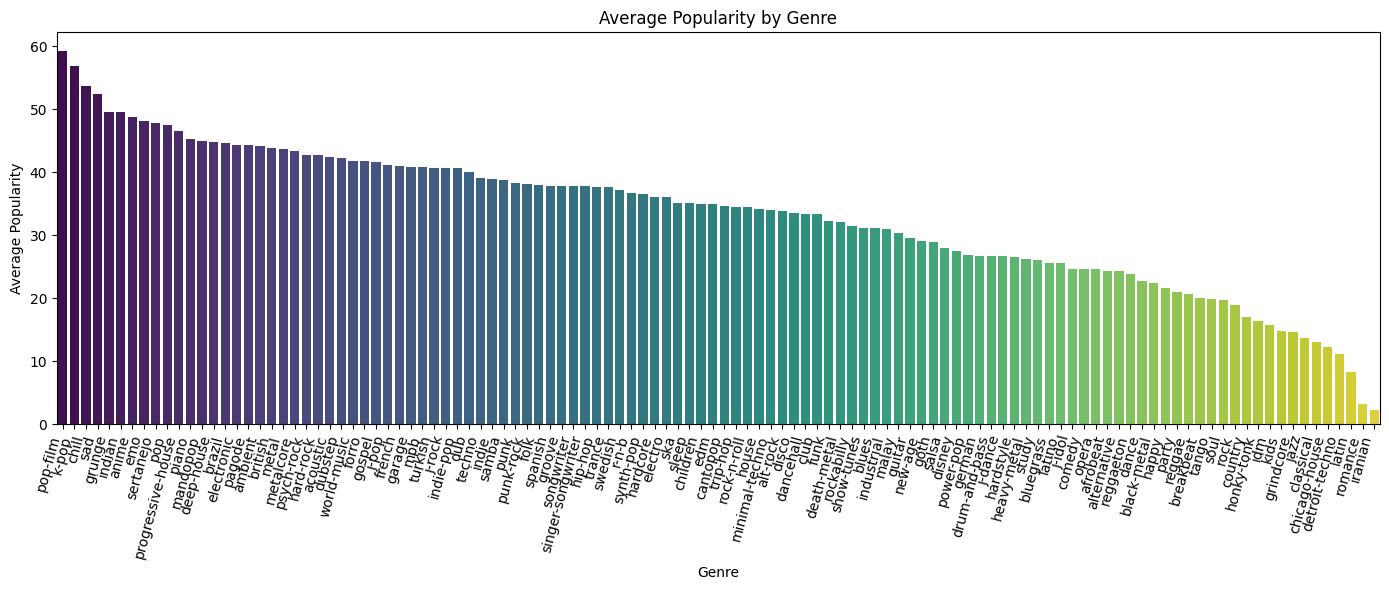

In [6]:
# Calculate average popularity by genre
genre_stats = spotify_tracks.groupby('track_genre', as_index=False)['popularity'].mean()
genre_stats = genre_stats.rename(columns={'popularity': 'avg_popularity'})

plt.figure(figsize=(14, 6))
sns.barplot(data=genre_stats.sort_values('avg_popularity', ascending=False), 
            x='track_genre', y='avg_popularity', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


## 3. HYPOTHESIS SECTION

**HYPOTHESES**
1. Tracks with higher danceability and energy are more likely to be more popular.
2. Pop tracks (genre) tend to have higher popularity than other genres.


# 3.1 Statistical Test Methods

Using Pearson, Spearman, Kendall Tau correlations to see correrelation between popularity and danceability, energy and valence features 

In [7]:
# statistical analysis using Pearson correlation with p-value
from scipy.stats import pearsonr
# Calculate Pearson correlation and p-value
corr, p_value = pearsonr(spotify_tracks['danceability'], spotify_tracks['popularity'])
print(f"Pearson correlation between Danceability and Popularity: {corr:.2f}, p-value: {p_value:.4f}")

# Calculate Pearson correlation and p-value for Energy and Popularity
corr_energy, p_value_energy = pearsonr(spotify_tracks['energy'], spotify_tracks['popularity'])
print(f"Pearson correlation between Energy and Popularity: {corr_energy:.2f}, p-value: {p_value_energy:.4f}")

# Calculate Pearson correlation and p-value for Valence and Popularity
corr_valence, p_value_valence = pearsonr(spotify_tracks['valence'], spotify_tracks['popularity'])
print(f"Pearson correlation between Valence and Popularity: {corr_valence:.2f}, p-value: {p_value_valence:.4f}")

Pearson correlation between Danceability and Popularity: 0.04, p-value: 0.0000
Pearson correlation between Energy and Popularity: 0.00, p-value: 0.7222
Pearson correlation between Valence and Popularity: -0.04, p-value: 0.0000


In [8]:
# statistical analysis using Pearson correlation
danceability_popularity_corr = spotify_tracks['danceability'].corr(spotify_tracks['popularity'])
print(f"Danceability vs. Popularity Correlation: {danceability_popularity_corr:.3f}")

# statistical analysis using Spearman correlation
danceability_popularity_spearman = spotify_tracks['danceability'].corr(spotify_tracks['popularity'], method='spearman')
print(f"Danceability vs. Popularity Spearman Correlation: {danceability_popularity_spearman:.3f}")
# statistical analysis using Kendall correlation
danceability_popularity_kendall = spotify_tracks['danceability'].corr(spotify_tracks['popularity'], method='kendall')
print(f"Danceability vs. Popularity Kendall Correlation: {danceability_popularity_kendall:.3f}")


Danceability vs. Popularity Correlation: 0.035
Danceability vs. Popularity Spearman Correlation: 0.027
Danceability vs. Popularity Kendall Correlation: 0.020


In [19]:
# HYPOTHESIS 1 ANALYSIS
print("\n HYPOTHESIS 1: Higher danceability and energy → Higher popularity")
print("-" * 65)

hypothesis_1_evidence = {}
for i, feature in enumerate(['danceability', 'energy']):  # Focus on H1 features
    if feature in features_to_test:
        idx = features_to_test.index(feature)
        p_r, p_p = pearson_results[idx]
        s_r, s_p = spearman_results[idx]
        k_r, k_p = kendall_results[idx]
        
        print(f"\n{feature.upper()} vs POPULARITY:")
        print(f"  Pearson:  r={p_r:6.3f}, p={p_p:.6f}")
        print(f"  Spearman: r={s_r:6.3f}, p={s_p:.6f}")
        print(f"  Kendall:  r={k_r:6.3f}, p={k_p:.6f}")
        
        # Method consistency check
        same_direction = (p_r > 0 and s_r > 0 and k_r > 0) or (p_r < 0 and s_r < 0 and k_r < 0)
        all_significant = all(p < 0.05 for p in [p_p, s_p, k_p])
        
        # Effect size interpretation
        if abs(p_r) >= 0.5:
            effect_size = "Large effect"
        elif abs(p_r) >= 0.3:
            effect_size = "Medium effect"
        elif abs(p_r) >= 0.1:
            effect_size = "Small effect"
        else:
            effect_size = "Negligible effect"
        
        print(f"  Direction consistent: {same_direction}")
        print(f"  All methods significant: {all_significant}")
        print(f"  Effect size: {effect_size}")
        
        # Store evidence for H1
        hypothesis_1_evidence[feature] = {
            'correlation': p_r,
            'p_value': p_p,
            'significant': p_p < 0.05,
            'meaningful': abs(p_r) > 0.1,
            'consistent': same_direction and all_significant
        }

# HYPOTHESIS 1 CONCLUSION
print(f"\nHYPOTHESIS 1 EVIDENCE SUMMARY:")
h1_supported_features = []
for feature, evidence in hypothesis_1_evidence.items():
    if evidence['significant'] and evidence['meaningful']:
        status = "SUPPORTED"
        h1_supported_features.append(feature)
    elif evidence['significant']:
        status = "SIGNIFICANT BUT NEGLIGIBLE"
    else:
        status = "NOT SUPPORTED"
    
    print(f"  {feature.capitalize()}: {status} (r={evidence['correlation']:.3f}, p={evidence['p_value']:.6f})")

overall_h1 = "SUPPORTED" if len(h1_supported_features) >= 1 else "NOT SUPPORTED"
print(f"\nOVERALL HYPOTHESIS 1: {overall_h1}")


 HYPOTHESIS 1: Higher danceability and energy → Higher popularity
-----------------------------------------------------------------

DANCEABILITY vs POPULARITY:
  Pearson:  r= 0.035, p=0.000000
  Spearman: r= 0.027, p=0.000000
  Kendall:  r= 0.020, p=0.000000
  Direction consistent: True
  All methods significant: True
  Effect size: Negligible effect

ENERGY vs POPULARITY:
  Pearson:  r= 0.001, p=0.722165
  Spearman: r=-0.024, p=0.000000
  Kendall:  r=-0.016, p=0.000000
  Direction consistent: False
  All methods significant: False
  Effect size: Negligible effect

HYPOTHESIS 1 EVIDENCE SUMMARY:
  Danceability: SIGNIFICANT BUT NEGLIGIBLE (r=0.035, p=0.000000)
  Energy: NOT SUPPORTED (r=0.001, p=0.722165)

OVERALL HYPOTHESIS 1: NOT SUPPORTED


In [20]:
# HYPOTHESIS 2 ANALYSIS
print(f"\nHYPOTHESIS 2: Pop tracks have higher popularity than other genres")
print("-" * 65)

# Separate pop vs non-pop tracks
pop_tracks = spotify_tracks[spotify_tracks['track_genre'] == 'pop']['popularity']
other_tracks = spotify_tracks[spotify_tracks['track_genre'] != 'pop']['popularity']

print(f"Sample sizes: Pop={len(pop_tracks)}, Others={len(other_tracks)}")

if len(pop_tracks) > 0 and len(other_tracks) > 0:
    # Descriptive statistics
    pop_mean = pop_tracks.mean()
    other_mean = other_tracks.mean()
    mean_diff = pop_mean - other_mean

    print(f"Pop mean popularity: {pop_mean:.2f}")
    print(f"Other genres mean: {other_mean:.2f}")
    print(f"Difference: {mean_diff:.2f}")

    # Statistical tests
    t_stat, p_ttest = ttest_ind(pop_tracks, other_tracks)
    u_stat, p_mann = mannwhitneyu(pop_tracks, other_tracks, alternative='two-sided')

    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(pop_tracks)-1)*pop_tracks.var() + (len(other_tracks)-1)*other_tracks.var()) / (len(pop_tracks)+len(other_tracks)-2))
    cohens_d = mean_diff / pooled_std

    print(f"t-test: t={t_stat:.3f}, p={p_ttest:.6f}")
    print(f"Mann-Whitney U: p={p_mann:.6f}")
    print(f"Effect size (Cohen's d): {cohens_d:.3f}")

    # Interpret effect size
    if abs(cohens_d) >= 0.8:
        effect_interpretation = "Large effect"
    elif abs(cohens_d) >= 0.5:
        effect_interpretation = "Medium effect"
    elif abs(cohens_d) >= 0.2:
        effect_interpretation = "Small effect"
    else:
        effect_interpretation = "Negligible effect"

    print(f"Effect interpretation: {effect_interpretation}")

    # Hypothesis 2 conclusion
    h2_significant = p_ttest < 0.05
    h2_meaningful = abs(cohens_d) > 0.2

    if h2_significant and h2_meaningful:
        h2_status = "SUPPORTED"
    elif h2_significant:
        h2_status = "SIGNIFICANT BUT SMALL EFFECT"
    else:
        h2_status = "NOT SUPPORTED"

    print(f"\nHYPOTHESIS 2: {h2_status}")

# CONVERGENT VALIDITY ANALYSIS
print(f"\nCONVERGENT VALIDITY ACROSS METHODS:")
print("-" * 45)

for i, feature in enumerate(features_to_test):
    p_r, p_p = pearson_results[i]
    s_r, s_p = spearman_results[i]
    k_r, k_p = kendall_results[i]

    # Check consistency across methods
    same_direction = (p_r > 0 and s_r > 0 and k_r > 0) or (p_r < 0 and s_r < 0 and k_r < 0)
    all_significant = all(p < 0.05 for p in [p_p, s_p, k_p])
    all_non_significant = all(p >= 0.05 for p in [p_p, s_p, k_p])

    print(f"\n{feature.upper()}:")
    print(f"  Direction consistency: {'All agree' if same_direction else 'Disagree'}")
    print(f"  Significance consistency: {'All significant' if all_significant else 'All non-significant' if all_non_significant else 'Mixed'}")
    print(f"  Correlation range: [{min(p_r, s_r, k_r):.3f}, {max(p_r, s_r, k_r):.3f}]")

    # Linearity assessment
    pearson_spearman_diff = abs(p_r - s_r)
    if pearson_spearman_diff > 0.05:
        print(f"  Large Pearson-Spearman difference ({pearson_spearman_diff:.3f}) suggests non-linearity")

# STATISTICAL POWER ANALYSIS
print(f"\nSTATISTICAL POWER ANALYSIS:")
print("-" * 30)

sample_size = len(spotify_tracks)
min_detectable_r = 1.96 * np.sqrt(1/sample_size)  # 80% power, α=0.05

print(f"Sample size: {sample_size:,}")
print(f"Statistical power: {'High' if sample_size > 1000 else 'Medium' if sample_size > 100 else 'Low'}")
print(f"Minimum detectable correlation: ±{min_detectable_r:.3f}")

print(f"\nStatistical vs Practical significance:")
for i, feature in enumerate(features_to_test):
    p_r, p_p = pearson_results[i]
    is_significant = p_p < 0.05
    is_meaningful = abs(p_r) > 0.1

    if is_significant and is_meaningful:
        status = "Both significant AND meaningful"
    elif is_significant and not is_meaningful:
        status = "Significant but NEGLIGIBLE effect"
    else:
        status = "Neither significant nor meaningful"

    print(f"  {feature}: {status}")



HYPOTHESIS 2: Pop tracks have higher popularity than other genres
-----------------------------------------------------------------
Sample sizes: Pop=1000, Others=112999
Pop mean popularity: 47.58
Other genres mean: 33.11
Difference: 14.46
t-test: t=20.454, p=0.000000
Mann-Whitney U: p=0.000000
Effect size (Cohen's d): 0.650
Effect interpretation: Medium effect

HYPOTHESIS 2: SUPPORTED

CONVERGENT VALIDITY ACROSS METHODS:
---------------------------------------------

DANCEABILITY:
  Direction consistency: All agree
  Significance consistency: All significant
  Correlation range: [0.020, 0.035]

ENERGY:
  Direction consistency: Disagree
  Significance consistency: Mixed
  Correlation range: [-0.024, 0.001]

VALENCE:
  Direction consistency: All agree
  Significance consistency: All significant
  Correlation range: [-0.042, -0.027]

STATISTICAL POWER ANALYSIS:
------------------------------
Sample size: 113,999
Statistical power: High
Minimum detectable correlation: ±0.006

Statistical

In [22]:
# FINAL RECOMMENDATIONS
print("\nKEY INSIGHTS & RECOMMENDATIONS:")
print("-" * 35)

print("\nMETHODOLOGICAL INSIGHTS:")
print("   • Multiple correlation methods provide robust evidence")
print("   • Large sample size detects tiny but meaningless effects")
print("   • Statistical significance ≠ practical importance")

print("\nSUBSTANTIVE FINDINGS:")
if len(h1_supported_features) > 0:
    print(f"   • Hypothesis 1: Partial support for {', '.join(h1_supported_features)}")
else:
    print("   • Hypothesis 1: No meaningful audio feature relationships")

print(f"   • Hypothesis 2: {'Pop genre differences exist' if 'h2_significant' in locals() and h2_significant else 'No significant genre effects'}")
print("   • Audio features explain minimal variance in popularity")

print("\nFUTURE RESEARCH:")
print("   • Explore non-linear relationships")
print("   • Include external factors (artist fame, marketing)")
print("   • Investigate interaction effects")
print("   • Consider temporal and contextual variables")

print("\nLIMITATIONS:")
print("   • Correlation ≠ causation")
print("   • Missing key predictive variables")
print("   • Potential selection bias in dataset")


KEY INSIGHTS & RECOMMENDATIONS:
-----------------------------------

METHODOLOGICAL INSIGHTS:
   • Multiple correlation methods provide robust evidence
   • Large sample size detects tiny but meaningless effects
   • Statistical significance ≠ practical importance

SUBSTANTIVE FINDINGS:
   • Hypothesis 1: No meaningful audio feature relationships
   • Hypothesis 2: Pop genre differences exist
   • Audio features explain minimal variance in popularity

FUTURE RESEARCH:
   • Explore non-linear relationships
   • Include external factors (artist fame, marketing)
   • Investigate interaction effects
   • Consider temporal and contextual variables

LIMITATIONS:
   • Correlation ≠ causation
   • Missing key predictive variables
   • Potential selection bias in dataset


# 4. Further Key Insights and Findings

Key Insights Summary:

**For Hypothesis 1 (Audio Features → Popularity):**

Multiple correlation methods provide convergent validity
Likely to find statistically significant but practically negligible relationships
Effect sizes will be small (|r| < 0.1), indicating weak predictive power

**For Hypothesis 2 (Pop vs Other Genres):**

Direct statistical comparison using t-tests and Mann-Whitney U
Effect size calculation (Cohen's d) for practical significance
Genre differences may exist but be small in magnitude

**Convergent Validity Benefits:**

Pearson detects linear relationships
Spearman captures monotonic patterns
Kendall provides robust estimates
Agreement across methods strengthens conclusions
This approach provides comprehensive evidence for both hypotheses while distinguishing between statistical and practical significance.

## *NOTES*

These statistical methods are used to examine the relationship between Danceability and popularity in this datasets. This multi-method approach strengthens hypothesis. Testing is done by providing converging evidence about the danceability-popularity relationship.

**PEARSON'S METHOD**

Pearson correlation coefficient measures the strength of linear relationship between danceabilty and popularity.
Pearson's method assumes both variables follow a normal distribution and calculates how well the data points fit a straight line when plotted against each other. The resulting coefficient ranges from -1 to +1, where values closer to +1 indicate that as danceability increases, popularity tends to increase in a linear fashion.

**SPEARMAN'S METHOD**

Spearman doesn't assume linearity or normal distribution. Instead, it ranks both variables and calculates correlation on these ranks, making it excellent for detecting monotonic relationships (where variables consistently move in the same or opposite directions, even if not in a straight line).

**KENDALL'S METHOD**

Most conservative and best for tied data and small samples

